# RSA Timing Attack

In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEXMEGA'
CRYPTO_TARGET = 'AVRCRYPTOLIB'

# Firmware

In [21]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../hardware/victims/firmware/simpleserial-rsa-nchu
make PLATFORM=$1 CRYPTO_TARGET=$2

SS_VER set to SS_VER_1_1
C:/Users/GC_Lu/CHIPWH~1/cw/home/portable/avrgcc/bin/make clean_objs .dep 
make[1]: Entering directory 'C:/Users/GC_Lu/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/simpleserial-rsa-nchu'
SS_VER set to SS_VER_1_1
rm -f -- simpleserial-rsa-CWLITEXMEGA.hex
rm -f -- simpleserial-rsa-CWLITEXMEGA.eep
rm -f -- simpleserial-rsa-CWLITEXMEGA.cof
rm -f -- simpleserial-rsa-CWLITEXMEGA.elf
rm -f -- simpleserial-rsa-CWLITEXMEGA.map
rm -f -- simpleserial-rsa-CWLITEXMEGA.sym
rm -f -- simpleserial-rsa-CWLITEXMEGA.lss
rm -f -- objdir-CWLITEXMEGA/*.o
rm -f -- objdir-CWLITEXMEGA/*.lst
rm -f -- simpleserial-rsa.s simpleserial-rsa-xmega.s simpleserial-rsa-arm.s simpleserial.s XMEGA_AES_driver.s uart.s usart_driver.s xmega_hal.s rsa_basic.s bigint.s
rm -f -- simpleserial-rsa.d simpleserial-rsa-xmega.d simpleserial-rsa-arm.d simpleserial.d XMEGA_AES_driver.d uart.d usart_driver.d xmega_hal.d rsa_basic.d bigint.d
rm -f -- simpleserial-rsa.i simpleserial-rsa

# Hardware Setup

In [22]:
%run "../Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [23]:
fw_path = '../../hardware/victims/firmware/simpleserial-rsa-nchu/simpleserial-rsa-CWLITEXMEGA.hex'

In [24]:
cw.program_target(scope, prog, fw_path)

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 12869 bytes


# Experiment

In [6]:
scope.clock.adc_src = "clkgen_x1"
scope.adc.samples = 24000

# Improt File

In [7]:
import time 
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# Trace Capture Main File

In [8]:
def capture_RSA_trace(scope, target, text):
    scope.arm()
    target.simpleserial_write('p', text)
    ret = scope.capture()
    
    if ret:
        return None
    print(target.simpleserial_wait_ack())
    return scope.get_last_trace()

In [12]:
def capture_RSA_trace_beta(scope, target, text):
    scope.arm()
    target.simpleserial_write('k', text)
    ret = scope.capture()
    
    if ret:
        return None
    print(target.simpleserial_wait_ack(50000))
    return scope.get_last_trace()

# Test Capture

<IPython.core.display.Javascript object>


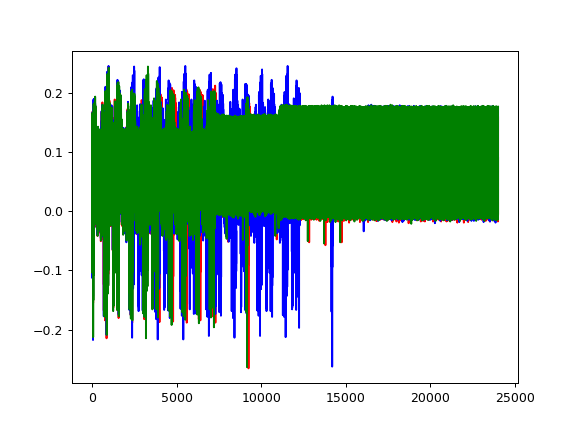

0
0
0


In [20]:
scope.adc.offset = 0
plt.figure()
text = bytearray([0x80, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'r')
text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'b')
text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'g')

<IPython.core.display.Javascript object>


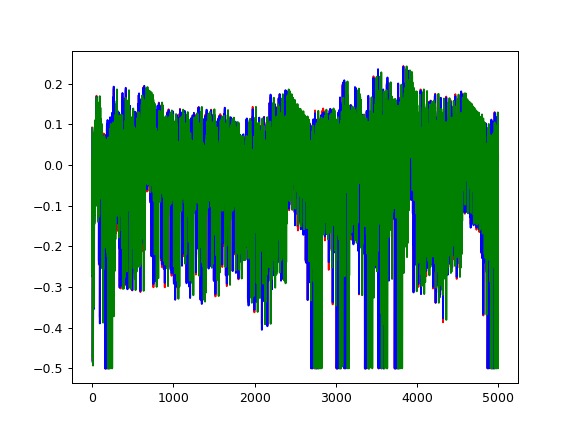

0
0
0


In [25]:
scope.adc.offset = 0
plt.figure()
text = bytearray([0x80, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'r')
text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'b')
text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
trace = capture_RSA_trace(scope, target, text)
plt.plot(trace, 'g')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<IPython.core.display.Javascript object>


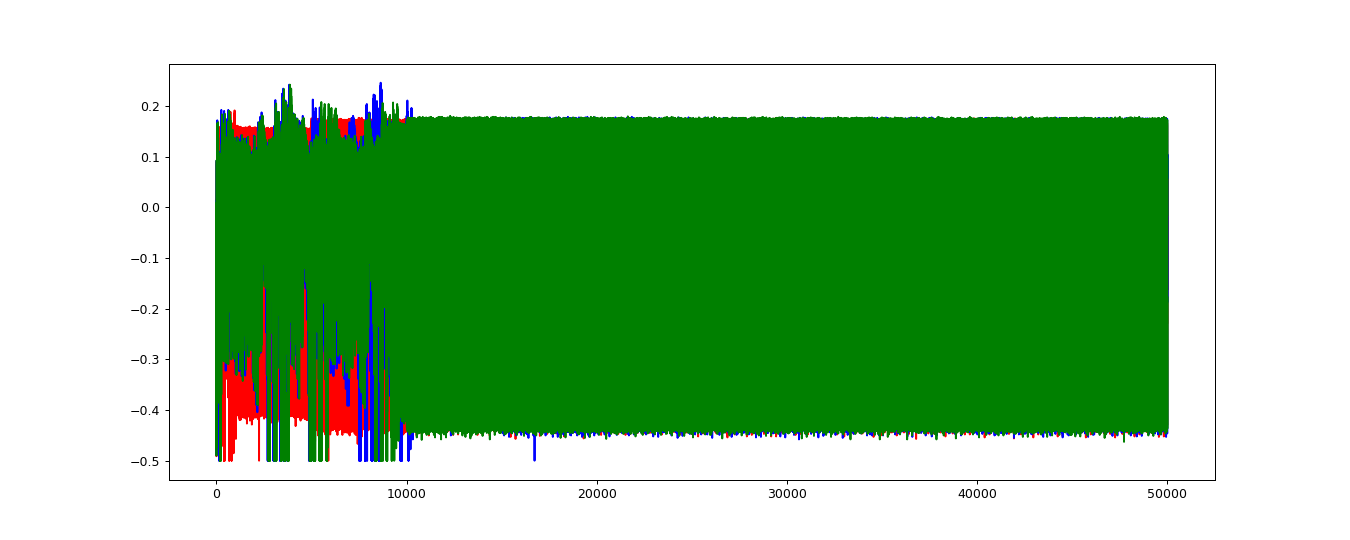

In [29]:
n=10

trace1=[]
trace2=[]
trace3=[]

for i in range(n):
    scope.adc.offset = 24400 * i
    text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
    trace = pd.DataFrame(capture_RSA_trace(scope, target, text))
#     trace1 = trace1.append(trace, ignore_index=True)
    trace1 = np.concatenate((trace1, trace), axis=None)
    
    text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
    trace = pd.DataFrame(capture_RSA_trace(scope, target, text))
#     trace1 = trace1.append(trace, ignore_index=True)
    trace2 = np.concatenate((trace2, trace), axis=None)

    text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
    trace = pd.DataFrame(capture_RSA_trace(scope, target, text))

    trace3 = np.concatenate((trace3, trace), axis=None)



plt.figure(figsize=(15, 6))
plt.plot(trace1, 'r')
time.sleep(1)
plt.plot(trace2, 'b')
time.sleep(1)
plt.plot(trace3, 'g')
plt.show()

<IPython.core.display.Javascript object>


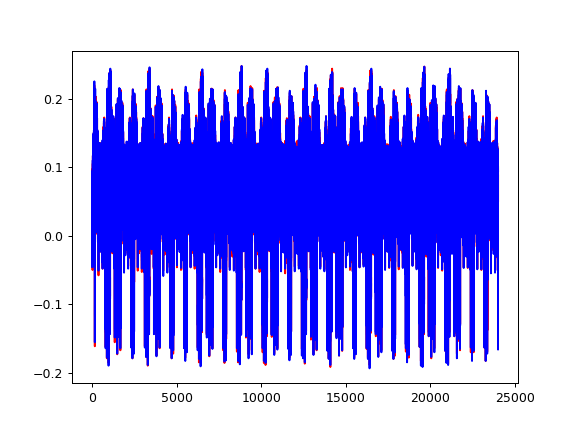

0x0
0x0


In [11]:
scope.adc.offset = 0
plt.figure(0)
text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
trace = capture_RSA_trace_beta(scope, target, text)
plt.plot(trace, 'r')
text = bytearray([0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff, 0xff])
trace = capture_RSA_trace_beta(scope, target, text)
plt.plot(trace, 'b')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<IPython.core.display.Javascript object>


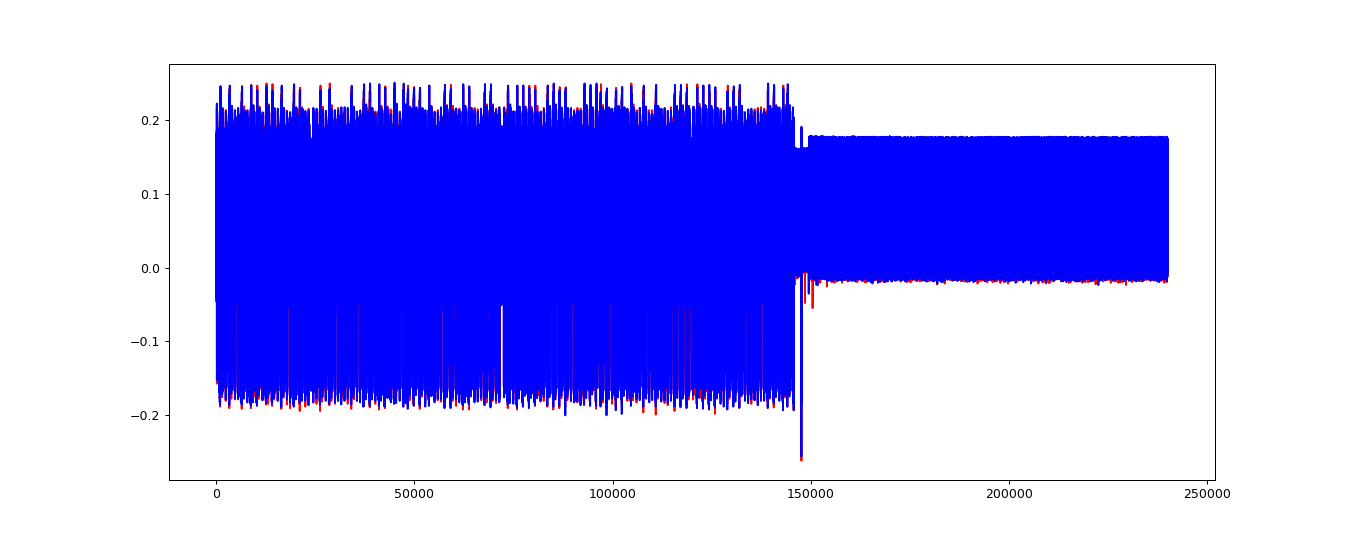

In [13]:
n=10

trace1=[]
trace2=[]

for i in range(n):
    scope.adc.offset = 24400 * i
    text = bytearray([0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00])
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))
#     trace1 = trace1.append(trace, ignore_index=True)
    trace1 = np.concatenate((trace1, trace), axis=None)

    text = bytearray([0x50, 0xb4, 0xc1, 0x41, 0x36, 0xbd, 0x19, 0x8c, 0x2f, 0x3c, 0x3e, 0xd2, 0x43, 0xfc, 0xe0, 0x36])
    trace = pd.DataFrame(capture_RSA_trace_beta(scope, target, text))

    trace2 = np.concatenate((trace2, trace), axis=None)



plt.figure(figsize=(15, 6))
plt.plot(trace1, 'r')
plt.plot(trace2, 'b')
plt.show()

In [ ]:
scope.dis()
target.dis()